In [29]:
import math
from math import cos, sin, acos
import numpy as np
import random as random
from matplotlib import pyplot as plt

First we create 100 {x,y} points using eqn 2.28

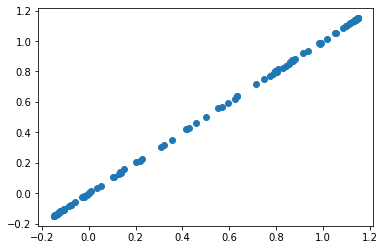

In [52]:
# Creating (x,y) from Estey approach:
    # x = c_x cos(phi_c + phi_d) + b_x
    # y = c_y cos(phi_c - phi_d) + b_y
    # Note: here Estey has c_x, c_y as Ax, Ay but I think this
    # may be the same thing

numPoints = 100
X = np.empty(numPoints)
Y = np.empty(numPoints)
Phi_c = np.empty(numPoints)
contrast = .65
c_x = contrast
c_y = contrast
b_x = 1/2
b_y = 1/2

# ----- SETTING PHI_D ----- # 
# 0 < phi_d < pi/2 (gets full range of cos when phi_c = pi/2)
phi_d = math.pi/1000
# -----               ----- # 

for i in range(numPoints):
    phi_c = random.uniform(0, 2*math.pi)
    Phi_c[i] = phi_c
    x_i = c_x * cos(phi_c + phi_d) + b_x
    X[i] = x_i
    y_i = c_y * cos(phi_c - phi_d) + b_y
    Y[i] = y_i
plt.scatter(X,Y)
plt.show()

Then get [a1, a2, ... ,a6] from eqn 2.31

In [53]:
A = 1 / ((c_x)**2)
B = -(2*cos(2*phi_d)) / (c_x*c_y)
C = 1/(c_y)**2
D = (2*b_y*cos(2*phi_d)/(c_x*c_y)) - (2*b_x)/(c_x)**2
E = (2*b_x*cos(2*phi_d)/(c_x*c_y)) - (2*b_y)/(c_y)**2
F = ((b_x)**2/((c_x)**2) + (b_y)**2/((c_y)**2) - 
(2*b_x*b_y*cos(2*phi_d))/(c_x*c_y) - 
4*(cos(phi_d))**2*(sin(phi_d))**2)

coefficients = np.array([A,B,C,D,E,F])
print(coefficients)


[ 2.36686391e+00 -4.73363437e+00  2.36686391e+00 -4.67198671e-05
 -4.67198671e-05 -1.61179645e-05]


##### plot resulting ellipse from the parameters calcualted and scatter plot of points

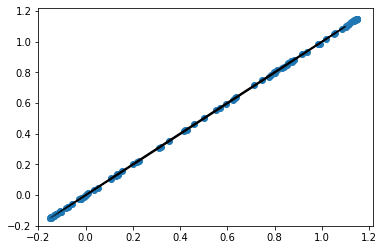

In [54]:
plt.scatter(X,Y)

x = np.linspace(-0.2, 1.1, 400)
y = np.linspace(-0.2, 1.1, 400)
x, y = np.meshgrid(x, y)
assert B**2 - 4*A*C < 0
plt.contour(x, y,(A*x**2 + B*x*y + C*y**2 + D*x + E*y + F), [0], colors='k')
plt.show()

# Verify eqn 2.31

Now check that Ax^2 + Bxy + Cy^2 + Dx + Ey + F = 0 is satisfied for all 100 points. This will verify that eqn 2.31 gives the correct [ABCDEF] vector

In [55]:
error_vec = np.empty(numPoints)
for i in range(numPoints):
    error = A*(X[i]**2) + B*X[i]*Y[i] + C*(Y[i]**2) + D*X[i] + E*Y[i] + F
    error_vec[i] = error
print(sum(error_vec))
print('average error value: ' + str(sum(error_vec) / numPoints))

-2.8049462167008266e-15
average error value: -2.8049462167008265e-17


Now check that the {x,y} used in eqn 2.31 may refer to the {x',y'} in eqn 2.30:

In [35]:
# creating {x', y'}:
X_prime = np.empty(numPoints)
Y_prime = np.empty(numPoints)
for i in range (numPoints):
    x_prime = (X[i] - b_x) / c_x
    y_prime = (Y[i] - b_y) / c_y
    X_prime[i] = x_prime
    Y_prime[i] = y_prime

# finding error using {x', y'}
error_vec_prime = np.empty(numPoints)
for i in range(numPoints):
    error_prime = A*(X_prime[i]**2) + B*X_prime[i]*Y_prime[i] + C*(Y_prime[i]**2) + D*X_prime[i] + E*Y_prime[i] + F
    error_vec_prime[i] = error_prime
print(sum(error_vec_prime))
print('average error value: ' + str(sum(error_vec_prime) / numPoints))

278.83851810442064
average error value: 2.7883851810442066


Error is large => {x,y} in eqn 2.31 does not reference {x', y'} in eqn 2.30

Now use the second part of eqn 2.30 to express {x', y'} and check the error:

In [36]:
# creating {x', y'}:
X_prime = np.empty(numPoints)
Y_prime = np.empty(numPoints)
for i in range (numPoints):
    x_prime = cos(Phi_c[i])*cos(phi_d) - sin(Phi_c[i])*sin(phi_d)
    y_prime = cos(Phi_c[i])*cos(phi_d) + sin(Phi_c[i])*sin(phi_d)
    X_prime[i] = x_prime
    Y_prime[i] = y_prime

# finding error using {x', y'}
error_vec_prime = np.empty(numPoints)
for i in range(numPoints):
    error_prime = A*(X_prime[i]**2) + B*X_prime[i]*Y_prime[i] + C*(Y_prime[i]**2) + D*X_prime[i] + E*Y_prime[i] + F
    error_vec_prime[i] = error_prime
print(sum(error_vec_prime))
print('average error value: ' + str(sum(error_vec_prime) / numPoints))

278.8385181044206
average error value: 2.7883851810442057


Things I could be doing wrong:
- assuming Ax = c_x, Ay = c_y (likely correct)
- assuming c_x = c_y = contrast, b_x = b_y = 1/2 = offset (likely correct)
- taking phi_c between [0,2pi]
- letting phi_d = pi/8
- ?

# Verify eqn 2.30

In [37]:
# 2.30 is just a trig identity, but below it's verified numerically 
error_vec_2_3 = np.empty(numPoints)
for i in range(numPoints):
    error_eqn_2_3 = X_prime[i] - (cos(Phi_c[i])*cos(phi_d) - sin(Phi_c[i])*sin(phi_d))
    error_vec_2_3[i] = error_eqn_2_3
print(sum(error_vec_2_3))
print('average error value: ' + str(sum(error_vec_2_3) / numPoints))

0.0
average error value: 0.0


Error is small! Eqn 2.30 is true and interpreted correctly (agrees w/ eqn 2.28). This also suggests Ax = c_x and Ay = c_y. (Note, eqn 2.30 is just a trig identity)

Next step is to veriffy the step from 2.30.5 to 2.31. Moving to Mapel

NOTICE: eqn 2.30 flips the +- that the trig identity from google gives. This doesn't help with the derivation though? bc 2.30.5 still holds.
